In [ ]:
import numpy as np
import json
import matplotlib.pyplot as plt
from cellpack_analysis.utilities.PILR_tools import (
    average_over_dimension,
)

: 

Read in individual PILRs

In [9]:
base_path = "/allen/aics/animated-cell/Saurabh/cellpack-analysis/results/sample_8d/"
file_name = "individual_PILR.json"

In [10]:
with open(base_path + file_name, "r") as f:
    individual_PILR_dict = json.load(f)

In [11]:
individual_PILR_dict_bak = individual_PILR_dict.copy()

In [46]:
individual_PILR_dict = individual_PILR_dict_bak.copy()

In [45]:
average_over_phi = True

In [47]:
for key, value in individual_PILR_dict.items():
    value = np.array(value)
    if average_over_phi:
        avg_value = np.zeros((value.shape[0], value.shape[1], 64))
        for ind in range(value.shape[0]):
            avg_value[ind] = average_over_dimension(value[ind])
        value = avg_value
    
    new_values = np.zeros((value.shape[0], value.shape[1] // 2, value.shape[2]))
    for ind in range(value.shape[0]):
        new_values[ind] = value[ind][(len(value[ind]) // 2 + 1) :]
        new_values[ind] = new_values[ind] / np.max(new_values[ind])
    individual_PILR_dict[key] = new_values.reshape(new_values.shape[0], -1)
    print(key, individual_PILR_dict[key].shape)

SLC25A17 (305, 2048)
nucleus_cube (305, 2048)
random (305, 2048)
membrane (305, 2048)
nucleus_linear (305, 2048)
nucleus_square (305, 2048)
nucleus_twelve (305, 2048)


In [36]:
combined_PILR = np.concatenate(list(individual_PILR_dict.values()), axis=0)
combined_PILR.shape

(2135, 262208)

## Plot pacmap/pca

In [37]:
from cellpack_analysis.utilities.PILR_tools import get_embeddings

In [42]:
metric = "pacmap"
num_samples = 305
project_channel = True

In [43]:
X_transformed, X_exp_transformed = get_embeddings(
    combined_PILR,
    metric,
    num_samples=num_samples,
    project_channel=project_channel,
)

### Plot colorized pacmap/pca

nucleus_cube
random
membrane
nucleus_linear
nucleus_square
nucleus_twelve


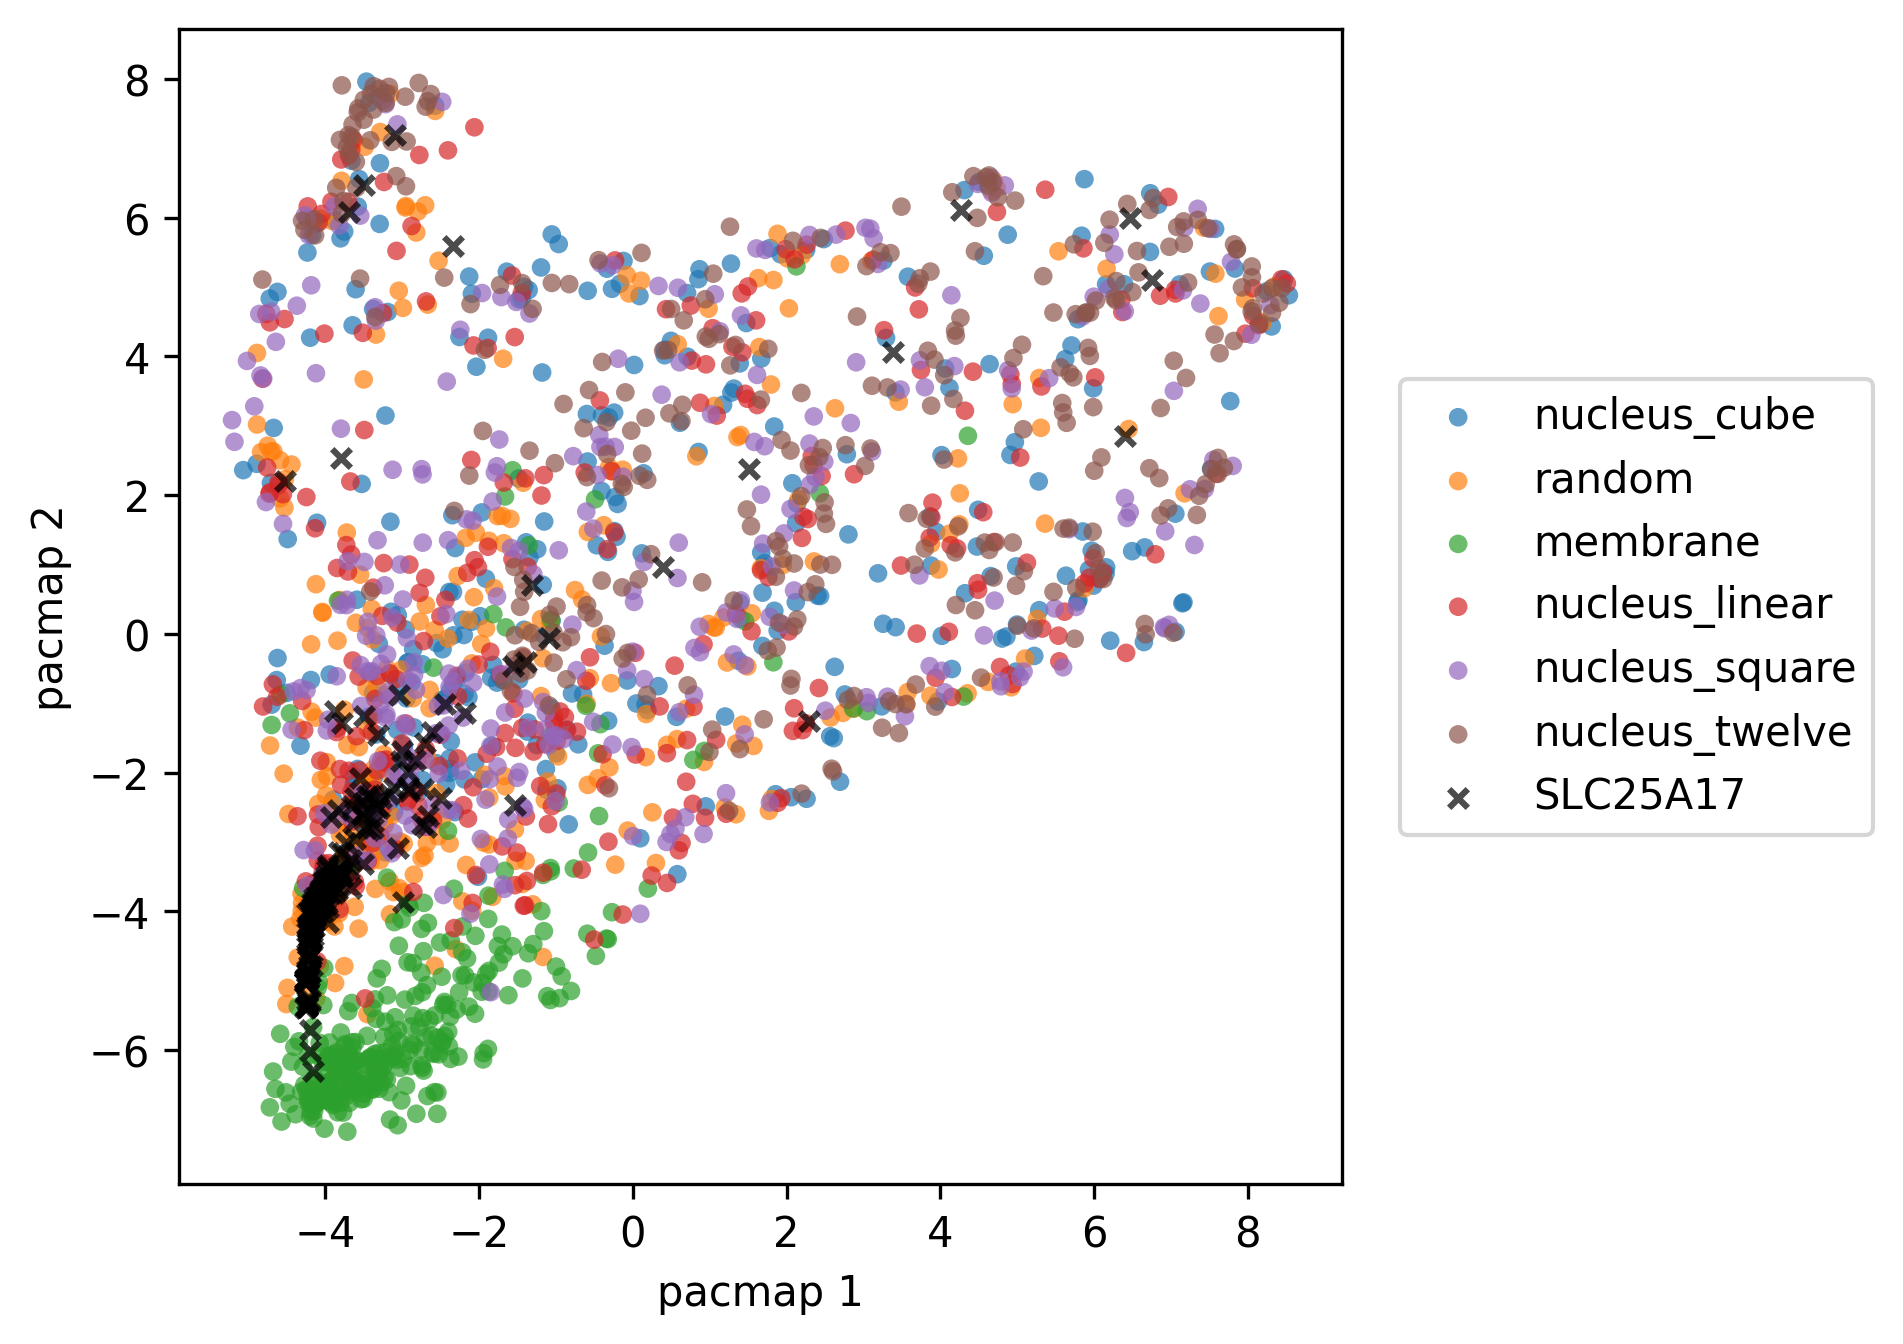

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=300)
prev_ind = 0
for ct, (ch, array) in enumerate(individual_PILR_dict.items()):
    if ch == "SLC25A17" and project_channel:
        continue
    num_pts = array.shape[0]
    next_ind = prev_ind + num_pts
    # if not ((ch == "nucleus_twelve")):
    #     prev_ind = next_ind
    #     continue
    print(ch)
    # print(prev_ind, next_ind, X_transformed.shape)
    X_twelve = X_transformed[prev_ind:next_ind, :]
    ax.scatter(
        X_transformed[prev_ind:next_ind, 0],
        X_transformed[prev_ind:next_ind, 1],
        s=20,
        label=ch,
        alpha=0.7,
        edgecolors="none",
    )
    prev_ind = next_ind
if project_channel:
    ax.scatter(
        X_exp_transformed[:, 0],
        X_exp_transformed[:, 1],
        s=20,
        label="SLC25A17",
        c="black",
        marker="x",
        alpha=0.7,
    )
ax.legend(bbox_to_anchor=(1.05, 0.5), loc="center left", borderaxespad=0.0)
ax.set_xlabel(f"{metric} 1")
ax.set_ylabel(f"{metric} 2")
plt.show()

## Plot phi averaged PILRs

In [5]:
from cellpack_analysis.utilities.plotting_tools import save_PILR_image

In [ ]:
base_path = "/allen/aics/animated-cell/Saurabh/cellpack_analysis/results/sample_8d/"
file_name = "avg_PILR.json"

In [ ]:
with open(base_path + file_name, "r") as f:
    avg_PILR_dict = json.load(f)

In [ ]:
avg_PILR_dict_bak = avg_PILR_dict.copy()

In [ ]:
for ch, value in avg_PILR_dict.items():
    value = np.array(value)
    avg_PILR_dict[ch] = average_over_phi(value)

In [ ]:
result_folder = "../../results/sample_8d"

In [ ]:
for ch, value in avg_PILR_dict.items():
    save_PILR_image(value, ch, save_dir=result_folder, suffix="_avg_phi", aspect=1)

## 3D PILR analysis